# Importing the required libraries

These libraries are essential for data analysis, visualization, and manipulation in Python:

1.pandas (pd)
    Used for data manipulation and analysis.
    Provides data structures like DataFrames and Series to work with structured data (e.g., CSV, Excel, SQLtables).
    Functions for data cleaning, filtering, grouping, merging, and aggregation.
    
2.NumPy (np)
    Used for numerical computing in Python.
    Provides support for large, multi-dimensional arrays and matrices.
    Includes mathematical functions for linear algebra, statistics, and random number generation.
    Highly optimized for performance compared to Python lists.
    
3.Matplotlib (plt)
    A fundamental plotting library for Python.
    Allows creating static, animated, and interactive visualizations.
    Can generate line plots, bar charts, histograms, scatter plots, etc.
    Provides fine-grained control over plots (labels, colors, legends, etc.).
    
4.Seaborn (sns)
    Built on top of Matplotlib, used for statistical data visualization.
    Provides beautiful and informative plots with minimal code.
    Includes built-in themes and color palettes.
    Useful for visualizing relationships in datasets using heatmaps, boxplots, violin plots, pair plots, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Loading and Displaying the Dataset

In [2]:
df = pd.read_csv('/Users/abhinavkumar/Downloads/imdb_movie_dataset.csv')
print(df.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

# Check for missing values

In [3]:
print("missing values in each coloumn:")
print(df.isnull().sum())

missing values in each coloumn:
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


# Drop rows with missing values in relevant columns

In [4]:
df = df.dropna(subset=['Revenue (Millions)','Metascore'])

# selecting relevant features and target variables

In [5]:
features = ['Year','Runtime (Minutes)','Votes', 'Revenue (Millions)', 'Metascore']
target = 'Rating'

# splitting dataset into Features(x) and target(y)

In [6]:
x = df[features]
y = df[target]

In [7]:
print(x.isnull().sum())  
print(y.isnull().sum())
print(x.shape, y.shape)

Year                  0
Runtime (Minutes)     0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64
0
(838, 5) (838,)


# splitting the dataset into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"X_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
numeric_df = df.select_dtypes(include=[np.number])

X_train shape: (670, 5), y_train shape: (670,)
X_test shape: (168, 5), y_test shape: (168,)


In [9]:
print(f"X shape: {x.shape}")  
print(f"y shape: {y.shape}")

X shape: (838, 5)
y shape: (838,)


# standarize the features(feature scaling)

* StandardScaler is a preprocessing tool from scikit-learn that standardizes features by removing the mean           and scaling to unit variance.
* It ensures that all features have mean = 0 and standard deviation = 1.

# Why Use Standardization?
    ✅ Improves Model Performance → Many ML models work better with normalized data.
    ✅ Prevents Feature Domination → Large numbers (e.g., budgets in millions) won’t dominate smaller ones (e.g.,          ratings out of 10).
    ✅ Required for Distance-Based Models → Like KNN, SVM, and PCA.

In [10]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Traning the model using LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

 # Model evaluation (mse and r2)
     This code evaluates the performance of a trained machine learning regression model using Mean Squared Error        (MSE) and R² Score (R-squared)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test_scaled)
print(f"y_pred shape: {y_pred.shape}, y_test shape: {y_test.shape}")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

y_pred shape: (168,), y_test shape: (168,)
Mean Squared Error: 0.30231162113485127
R² Score: 0.6186677216262519


# Predicting the rating for a new movie

In [13]:
next_year = 2025
new_movie = pd.DataFrame({ 'Year': [next_year, next_year, next_year, next_year, next_year],
    'Runtime (Minutes)': [120, 150, 90, 180, 110],  
    'Votes': [50000, 100000, 20000, 150000, 75000],  
    'Revenue (Millions)': [100, 200, 50, 300, 120], 
    'Metascore': [70, 85, 60, 90, 75]})

In [14]:
new_movies_scaled = scaler.transform(new_movie)
pred_rating = model.predict(new_movies_scaled)
for i,rating in enumerate(pred_rating,1):
    print(f'Predicted Rating for new movie {i}: {rating}')

Predicted Rating for new movie 1: 6.923224697680061
Predicted Rating for new movie 2: 7.493267631960317
Predicted Rating for new movie 3: 6.463493927473539
Predicted Rating for new movie 4: 7.786954927830182
Predicted Rating for new movie 5: 7.014890426702389


# Correlation heatmap
    A correlation heatmap is a visual representation of the relationships (correlations) between numerical features     in a dataset.It helps identify which variables are positively or negatively correlated.
    
* The correlation coefficient (r) ranges from -1 to 1:
    r=1 → Perfect positive correlation (as one increases, the other increases).
    r=−1 → Perfect negative correlation (as one increases, the other decreases).
    r=0 → No correlation (the variables are independent).

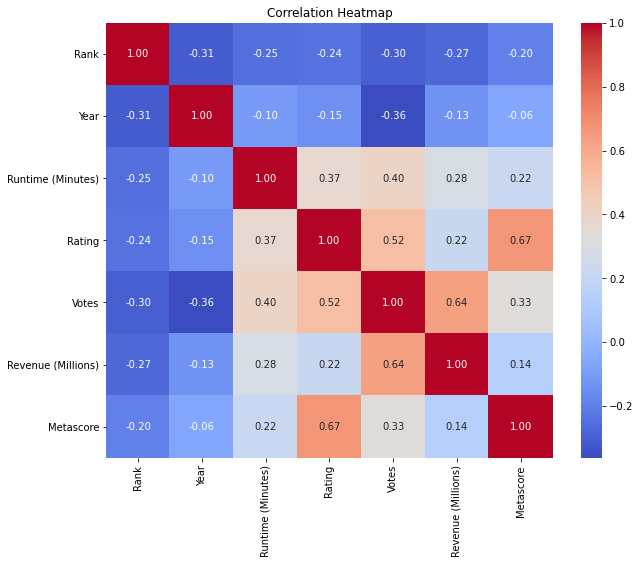

In [15]:
plt.figure(figsize=(10,8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.png')
plt.show()

# Distribution of ratings

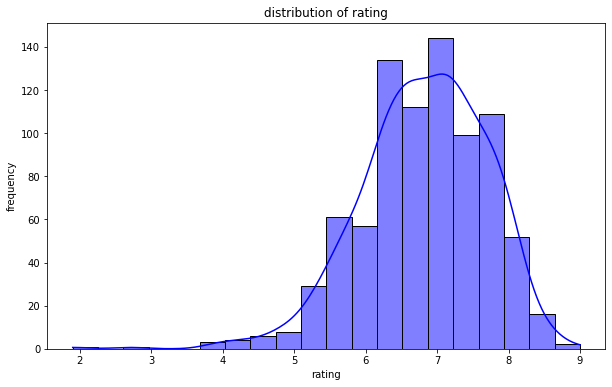

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'],bins=20,kde=True,color='blue')
plt.title('distribution of rating')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.savefig('distribution of rating.png')
plt.show()

# Votes vs Ratings

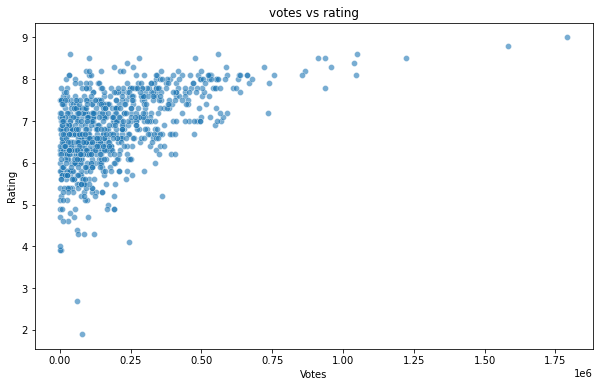

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Votes',y='Rating',data=df,alpha=0.6)
plt.title('votes vs rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.savefig('votes vs rating.png')
plt.show()

# Revenue(Millions) vs Ratings

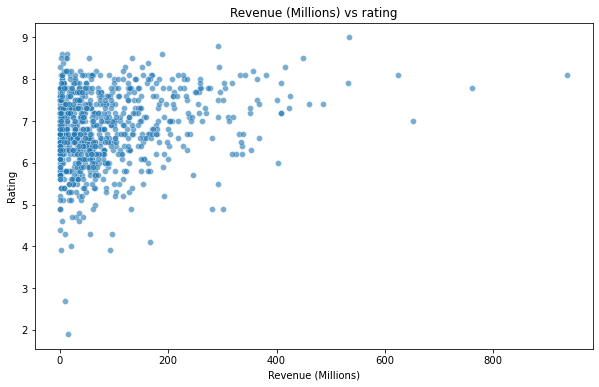

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Revenue (Millions)',y='Rating',data=df,alpha=0.6)
plt.title('Revenue (Millions) vs rating')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Rating')
plt.savefig('Revenue (Millions) vs rating.png')
plt.show()

# Metascore vs ratings

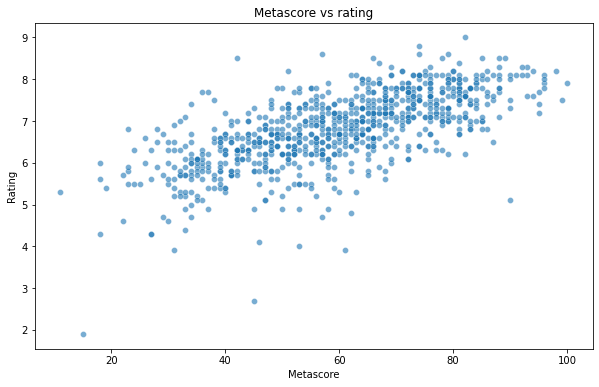

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Metascore',y='Rating',data=df,alpha=0.6)
plt.title('Metascore vs rating')
plt.xlabel('Metascore')
plt.ylabel('Rating')
plt.savefig('Metascore vs rating.png')
plt.show()